In [150]:
import ruptures as rpt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [316]:
n_samples, dim, sigma = 200, 1, 2
n_bkps = 0  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

In [317]:
df = pd.DataFrame(signal)
df.to_csv('./sig.csv', index=False)

In [322]:
a = np.linspace(0, 3, num=200)
win = 10
df = pd.read_csv('./sig.csv')
df['0'] = df['0']
df['0'] = df['0'].rolling(win).mean()
df['0'] = df['0']/3 + a
df['ratio'] = (df['0'].shift(-1) - df['0'])
raw = list(df['0'])
tmp = list(df['ratio'])

In [323]:
df

,0,ratio
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,4.792879,-0.001844
196,4.791035,-0.030990
197,4.760045,-0.266933
198,4.493112,-0.004303


In [347]:
p_ewr = []
beta = 0.99
si_cnt = 0
# ewr = tmp[0] + raw[0]
ewr = tmp[win-1]

p_ewr.append(ewr)

for idx,(i, j) in enumerate(zip(tmp[win-1:], raw[win-1:])):
    # ewr = ewr * beta + i * (1-beta) + j
    lll = ''
    pre = ewr
    
    # ewr += i
       
    ewr = ewr * beta + i
    p_ewr.append(ewr)
    if np.sign(pre) == np.sign(ewr):
        si_cnt += 1
    else:
        si_cnt -= 1
    if abs(si_cnt) >= 10:
        print(idx)
        si_cnt = 0
        lll = '------'
        print(f'{lll} {i:2.4f}, {ewr:2.4f}, {si_cnt} {lll}')
    

9
------ -0.0003, 0.4809, 0 ------
19
------ -0.0295, 0.5530, 0 ------
29
------ 0.0576, 0.5629, 0 ------
39
------ -0.0873, 0.3983, 0 ------
49
------ 0.0187, 0.4526, 0 ------
59
------ 0.1012, 0.7951, 0 ------
69
------ -0.0233, 0.6989, 0 ------
79
------ -0.0411, 1.1783, 0 ------
89
------ 0.1653, 1.3541, 0 ------
99
------ -0.0871, 0.9675, 0 ------
109
------ 0.0555, 0.7217, 0 ------
119
------ -0.0415, 1.1403, 0 ------
129
------ 0.1360, 1.4766, 0 ------
139
------ -0.1086, 0.8197, 0 ------
149
------ 0.1572, 1.4359, 0 ------
159
------ -0.0572, 1.6438, 0 ------
169
------ -0.0439, 1.0878, 0 ------
179
------ 0.0496, 1.4011, 0 ------
189
------ -0.0043, 1.4157, 0 ------


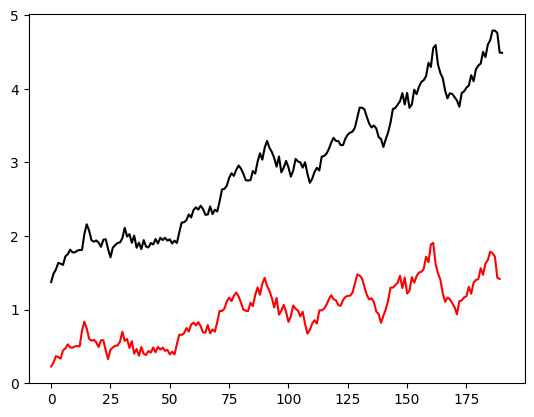

In [348]:

plt.plot(range(len(tmp[win-1:])), raw[win-1:], color = 'black')
plt.plot(range(len(tmp[win-1:])), p_ewr[1:], color = 'r')
# plt.plot(range(len(tmp[:])), tmp[:], color = 'g')
plt.show()